<a href="https://colab.research.google.com/github/moripova/Data-Science-Projects/blob/main/Full_Code_Project_1_MO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1><center><font size=10>Data Science and Business Analytics</center></font></h1>
<h1><center>Project Python Foundations/Full Code</center></h1>
<h1><center>Mavluda Oripova </center></h1>

---



---







<b><h2><center>FoodHub Analysis</center></h2></b>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)


### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/PYTHON/Project 1/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


In [ ]:
# Let's run the last 5 rows:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.310,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.180,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.220,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.180,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.450,Weekend,Not given,28,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
df.shape

(1898, 9)

In [ ]:
print('There are',df.shape[0],'rows and',df.shape[1],'columns.')

There are 1898 rows and 9 columns.


#### Observations:We can see that there are 1898 total entries/rows in the data.There are 9 columns, that include all the necessary information given in the data dictionary.
bold text


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

1.   There are 5 numerical values (1 float+4 integer) in the data 
2.  There are 4 object type columns
3.  'Rating' column data is read as object type, while it will be better represented as a numerical value.




We will check why "Rating" columns is read as object data type

In [ ]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

We see that the column consists of 'Not given' information, which causes the data to be interpreted as object. 

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]


*We can check the data dype of columns one more time to check for missing values. In addition, we can extract null values to look for any missing values.


In [ ]:
df.info()#running this formula we can double check the data types for assurance.
df.isnull().sum()#this formula will also help us see how many columns have missing data.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
*   From the output, we can confirm that there are 5 (1 float+4 integers) numeric columns, and 4 columns being read as objects.
* We can see that there are 1898 entries in all 9 columns, which indicates that there are no "null"/missing values.
* From extracting "null" value data, we see that there are no columns with missing data, with all column outputs coming as 0.
 




### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe(include='all').T 
# this formula will output the statistical summary for all variables, numerical and categorical.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.000,NaN,NaN,NaN,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,NaN,NaN,NaN,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.000,NaN,NaN,NaN,16.499,7.484,4.470,12.080,14.140,22.297,35.410
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.000,NaN,NaN,NaN,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,NaN,NaN,NaN,24.162,4.973,15.000,20.000,25.000,28.000,33.000


While the statistical summary gives us the general information about categorical variables, it will also help to check the count and percentage of categorical levels in each column

In [ ]:
# we can create a variable that includes only categorical data and run the value count. It will help to separate the columns to better view the data.
cat_cols=['restaurant_name','cuisine_type','day_of_the_week']
for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64
--------------------------------------------------
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64
--------------------------------------------------
Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64
--------------------------------------------------


In [ ]:
# We can also look into the same data as percentages
for column in cat_cols:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

Shake Shack                 0.115
The Meatball Shop           0.070
Blue Ribbon Sushi           0.063
Blue Ribbon Fried Chicken   0.051
Parm                        0.036
                             ... 
Sushi Choshi                0.001
Dos Caminos Soho            0.001
La Follia                   0.001
Philippe Chow               0.001
'wichcraft                  0.001
Name: restaurant_name, Length: 178, dtype: float64
--------------------------------------------------
American         0.308
Japanese         0.248
Italian          0.157
Chinese          0.113
Mexican          0.041
Indian           0.038
Middle Eastern   0.026
Mediterranean    0.024
Thai             0.010
French           0.009
Southern         0.009
Korean           0.007
Spanish          0.006
Vietnamese       0.004
Name: cuisine_type, dtype: float64
--------------------------------------------------
Weekend   0.712
Weekday   0.288
Name: day_of_the_week, dtype: float64
----------------------------------------------

#### Observations:
*   We can see that all columns have 1898 entries (total number of rows) which shows there are no missing values.
*   There are 178 unique restaurant names, 14 different cuisine types, and 2 different week days (weekend/weekday).
* The  most popular/top restaurant customers ordered from is Shake Shack (11%), the most popular cuisine is American (30%), followed by Japanese (24%). And we can also read from the data that most of the orders (71%) were placed on Weekends.
* The average food preparation time is 27 minutes. The minimum is 20 minutes and the max. time is 35 minutes.
*The average price of orders is around 16 dollars. The min. is 4 dollars and maximum price being around 35 dollars. 
* The average delivery time is 24 minutes. Minimum is 15 minutes, and the maximum is 33 minutes.





### **Question 5:** How many orders are not rated? [1 mark]

First, we can check what specific variables there are on the 'rating' column. Then we will run df.value_count() to see how many orders received specific ratings and how many orders were not rated/Not given.

In [ ]:
# finding the unique values on the 'rating' column:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
#finding the number of values for each unique entry:
df['rating'].value_counts() 

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
# finding the percent distribution of the value counts:
print(df['rating'].value_counts(normalize=True))

Not given   0.388
5           0.310
4           0.203
3           0.099
Name: rating, dtype: float64


#### Observations:
*From the output we can see that the 'rating' column consists of numeric information (5,3,4) and the 'Not given' for orders that were not rated.
*There are 736 orders that were not rated. From the percent distribution we can see that 38% of the orders were not rated; 31% were rated '5'; 20% were rated '4'; and 9% were rated '3' 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**We will start exploring the variables in order.**

## 1. Order ID

In [ ]:
# Let's check for unique orders numbers
df['order_id'].nunique() 

1898

There are 1898 unique orders in the dataset.

## 2. Customer ID

In [ ]:
# Let's check for unique customer ID's
df['customer_id'].nunique() 

1200

We can tell that 1200 out of 1898 orders were placed by unique customers.

## 3. Restaurant name

In [ ]:
# Let's check the number of unique restaurants
df['restaurant_name'].nunique() 

178

There are 178 unique restaurants in the dataset.

## 4. Cuisine type

In [ ]:
# Let's check the number of unique cuisine types and also analyze the data in a countplot view
df['cuisine_type'].nunique() 


14

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type');

NameError: ignored

We found that there are 14 different cuisine types on the dataset. From the counplot, we can clearly see that American cuising is the most popular, followed by Japanese, and Italian. Vietnamese cuisine has the least number of orders.

## 5. Cost of the order

In [ ]:
# running the value_counts function we can find cost of the orders that were ordered the most (top 10) 
df['cost_of_the_order'].value_counts().head(10)

12.180    86
12.130    82
12.230    47
24.200    42
29.100    37
24.250    36
12.080    36
24.300    35
14.070    32
29.150    30
Name: cost_of_the_order, dtype: int64

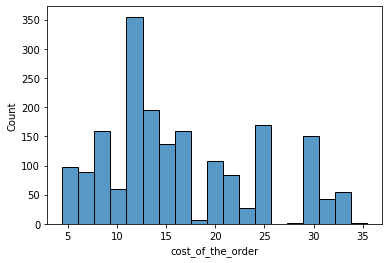

In [ ]:
#We can analyze the distribution of the cost of orders through Histogram; 
sns.histplot(data=df,x='cost_of_the_order')
plt.show()

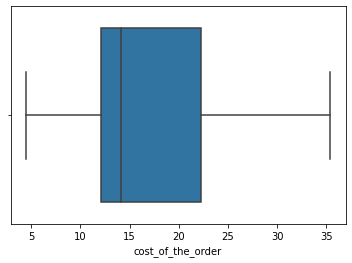

In [ ]:
# and Boxplot
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()



* The distribution of the cost of orders is skewed towards right, meaning that most orders are on the left of the graph, with frequences getting lower towards the right side.
* The orders above 35 dollars and below 5 dollars would be outliers,and we can see that outliers are not present in this column.
* From both graphs we can observe that mid 50% of the orders are around 12-15 dollars, the first 25% of the orders lie at the price around 12 dollars, and the third quarter of the orders lie at the price around 23 dollars.




## 6. Day of the Week

In [ ]:
# First we should check for the unique values:
df['day_of_the_week'].nunique() 

2

In [ ]:
# finding the percent distribution of the value counts:
print(df['day_of_the_week'].value_counts(normalize=True))

Weekend   0.712
Weekday   0.288
Name: day_of_the_week, dtype: float64


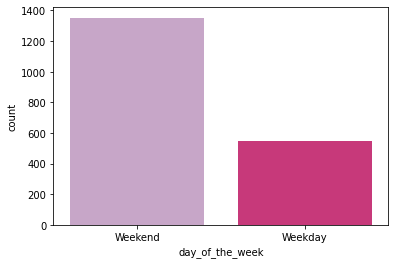

In [ ]:
# Then we plot a bar graph for the day of the week:
sns.countplot(data = df, x = 'day_of_the_week',palette='PuRd');

* From the analysis of the day of the week data we can see that the dataframe includes two categories: weekend and weekday information.
* The bar graph shows us that the orders are higher during the weekends (around 1300/71%) than on weekdays (around 500/28%).

## 7. Rating

In [ ]:
# First we should check for the unique values:
df['rating'].nunique()

4

In [ ]:
# To see what specific values are on the rating column, we can run the df.unique() function:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
# We can check the number of values for each unique entry:
df['rating'].value_counts() 

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
# finding the percent distribution of the value counts:
print(df['rating'].value_counts(normalize=True))

Not given   0.388
5           0.310
4           0.203
3           0.099
Name: rating, dtype: float64


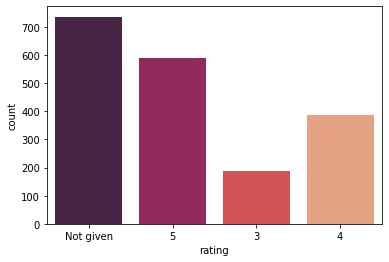

In [ ]:
# Then we plot a bar graph for the day of the week:
sns.countplot(data = df, x = 'rating',palette='rocket');

* From the analysis of the rating variable we can see that there are 4 values (Not Given, 5, 4, and 3) in the dataset.
* We found that 736 orders were not rated, which makes it 38% of the total orders. 
* We can also see that 588 (31%) orders were rated 5, 386 (20%) were rated 4, and 188 (9%) of orders were rated 3. 

## 8.Food Preparation Time

In [ ]:
# It will help to know the mean of the food preparation time of the total orders:
food_prep_mean= df['food_preparation_time'].mean()
print('The mean food preperation time for this dataset is', round(food_prep_mean, 2), 'minutes')

The mean food preperation time for this dataset is 27.37 minutes


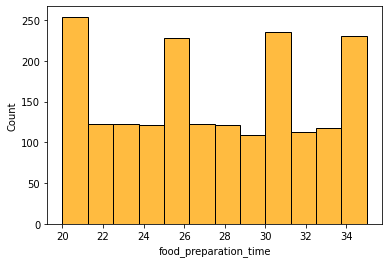

In [ ]:
# We can find the distribution of the values through histplot:
sns.histplot(data=df,x='food_preparation_time',color='orange') 
plt.show()

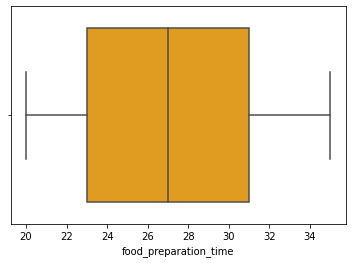

In [ ]:
# and to get the summary of the five major values, we can run the boxplot:
sns.boxplot(data=df,x='food_preparation_time',color='orange')
plt.show()

* From the analysis of the food preparation time we can conclude that the average time restaurants use to prepare food is 27 minutes
* From the graphs we can see the data is evenly/normally distributed.
* The minimum time of food preparation is 20 minutes and the maximum time is 35 minutes. From the graphs we see that there are no orders above the max and min,meaning there are no outliers.

## 9. Delivery Time

In [ ]:
# It will help to know the mean of the food preparation time of the total orders:
deliv_time_mean= df['delivery_time'].mean()
print('The mean delivery time for this dataset is', round(deliv_time_mean, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


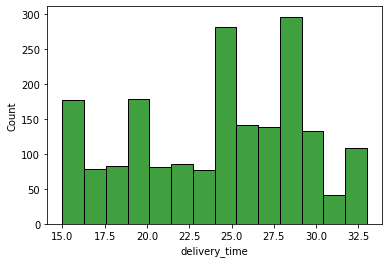

In [ ]:
# We can use the histplot to see the distribution of the data:
sns.histplot(data=df,x='delivery_time',color='green');

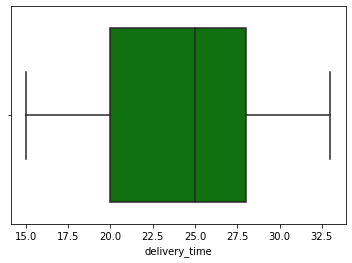

In [ ]:
# We can also use the boxplot to see the five number summary of the data:
sns.boxplot(data=df,x='delivery_time',color='green')
plt.show()

* The mean delivery time of the orders is 24.16 minutes.
* The data on the graphs are skewed to the left, meaning the frequences are mainly on the right side of the graph. 
* The minimum time of the delivery time is 15 minutes, the maximum time is 32.5 minutes. There are no orders below min. or above max. levels, so there are no outliers.
* The first quarter of the data lies on 20 minutes, third quarter is on 28 minute frame. The mid 50% (average) of the orders are delivered within around 24 minutes. 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# To get the number of orders based on restaurants, we can run the value_count function:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [ ]:
# We can also look into the percent distirbution of the orders per restaurant:
print(df['restaurant_name'].value_counts(normalize=True))

Shake Shack                 0.115
The Meatball Shop           0.070
Blue Ribbon Sushi           0.063
Blue Ribbon Fried Chicken   0.051
Parm                        0.036
                             ... 
Sushi Choshi                0.001
Dos Caminos Soho            0.001
La Follia                   0.001
Philippe Chow               0.001
'wichcraft                  0.001
Name: restaurant_name, Length: 178, dtype: float64


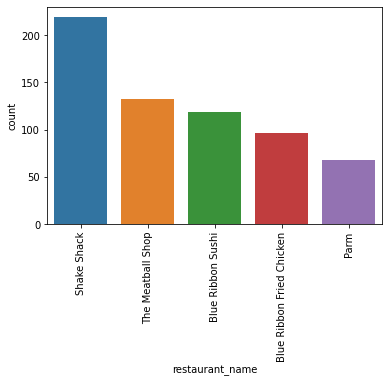

In [ ]:
# We can also visualize the data using countplot function, limiting the number of bars to top 5 (iloc) and rotating the names of the restaurants to fit the chart: 
sns.countplot(data=df, x='restaurant_name',order=df.value_counts('restaurant_name').iloc[:5].index)
plt.xticks(rotation=90)
plt.show()

#### Observations:
* The top 5 restaurants in terms of the number of orders received are:

1. Shake Shack - 219 orders (11% of the total orders)
2. The Meatball Shop - 132 orders (7% of the total orders)
3. Blue Ribbon Sushi - 119 orders (6% of the total orders)
4. Blue Ribbon Fried Chicken - 96 orders (5% of the total orders)
5. Parm - 68 orders (3% of the total orders)




 









### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# First, we need to create a variable to separate weekend from the 'day_of_the_week':
df_weekend = df[df['day_of_the_week'] == 'Weekend']
# Next, we run the value count for the df_weekend cuisine type:
df_weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

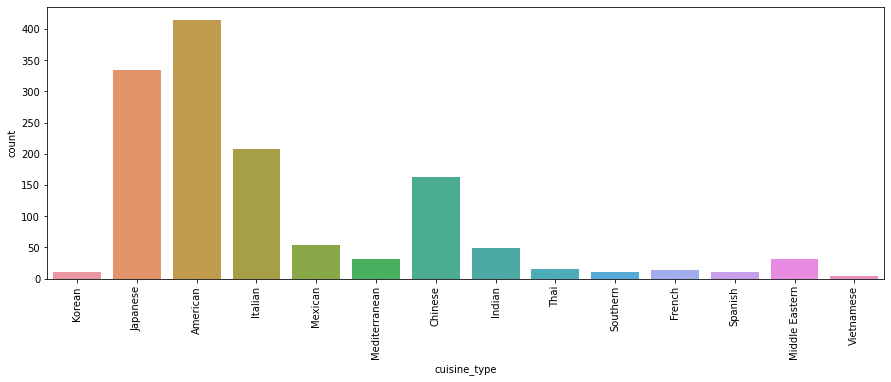

In [ ]:
# To visualize the data, we can create a countplot 
plt.figure(figsize = (15,5))
sns.countplot(data = df_weekend, x = 'cuisine_type'); 
plt.xticks(rotation=90)
plt.show()

#### Observations:
* From the outputs we can conclude that on weekends, the most popular cuisine is American cuisine (415 orders), followed by Japanese (335 orders) and Italian (207 orders).

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# First we need to create a variable that filters the orders above 20 dollars:
df_cost_above_20 = df[df['cost_of_the_order']>20]
# Then we look into the number of orders above $20 with the df.shape () function:
print('The number of total orders that cost above 20 dollars is:', df_cost_above_20.shape[0])
# Then we can add the percent of these orders compared to the total numbers:
percentage = (df_cost_above_20.shape[0] / df.shape[0]) * 100
print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:
* The calculations showed that 555, out of 1898 total orders, cost above $20. This comprise the 29.24% of the total orders.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# We can get the mean of the delivery time running the df.mean() function. It will help to define the function for an easier output. While printing, it will be better to reduce the number of decimals too:
delivery_time_mean= df['delivery_time'].mean()
print('The mean delivery time for this dataset is', round(delivery_time_mean, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


#### Observations:
* By running the df.mean() function we could identify that the average delivery time of the orders is around 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# We can find the top 3 most frequent customers by running the df.value_counts function and filtering the top 3:
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
* The output shows that the customer # 52832 is the most frequent customer who made 13 orders in total.
* The second customer #47440 made 10 orders.
* The third most frequent customer # 83287 made 9 orders in total. 


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


## Cost of the Order vs Cuisine

In [ ]:
#top 10 cuisines with average preparation time-max 10:
cuisine_top_10_cost=df.groupby('cuisine_type').mean()[['cost_of_the_order']].sort_values('cost_of_the_order', ascending=False).reset_index().head(15) 
cuisine_top_10_cost

,cuisine_type,cost_of_the_order
0,French,19.794
1,Southern,19.301
2,Thai,19.208
3,Spanish,18.994
4,Middle Eastern,18.821
5,Mexican,16.933
6,Indian,16.920
7,Italian,16.419
8,American,16.320
9,Chinese,16.305


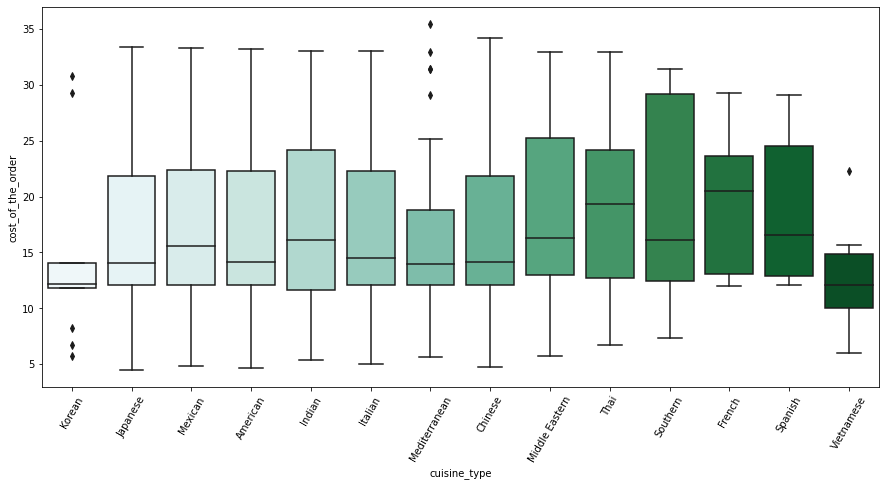

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'BuGn')
plt.xticks(rotation = 60)
plt.show()

* The top 3 cuisines that cost the most on average are French, Southern, and Thai. The Vietnamese cuisine has the lowest average cost of all the cuisines.
*We can see from the graph that the average price of the Korean cuisine is around 12 dollars and some restaurants are the outliers: some are cheaper than the minimum (12 dollars) and some are far more expensive (going up to 28-32 dollars) than the maximum price (14 dollars).
* Mediterranean cuisine also has 4 outlier restaurants, with the cost going up to 37 dollars (the max cost of the meditteranean cuisine is 25 dollars.   
* One restaurant that serves Vietnamese cuisine is an outlier, costing more than the maximum (15 dollars) price: 22 dollars. 

## Food Preperation Time vs Cuisine

In [ ]:
#top 10 cuisines with average preparation time-max 10:
df.groupby('cuisine_type').mean()[['food_preparation_time']].sort_values('food_preparation_time', ascending=False).reset_index().head(14) 


,cuisine_type,food_preparation_time
0,Southern,27.588
1,Chinese,27.512
2,Japanese,27.511
3,Italian,27.483
4,American,27.440
5,Thai,27.316
6,Indian,27.110
7,Mediterranean,27.000
8,Spanish,26.917
9,French,26.889


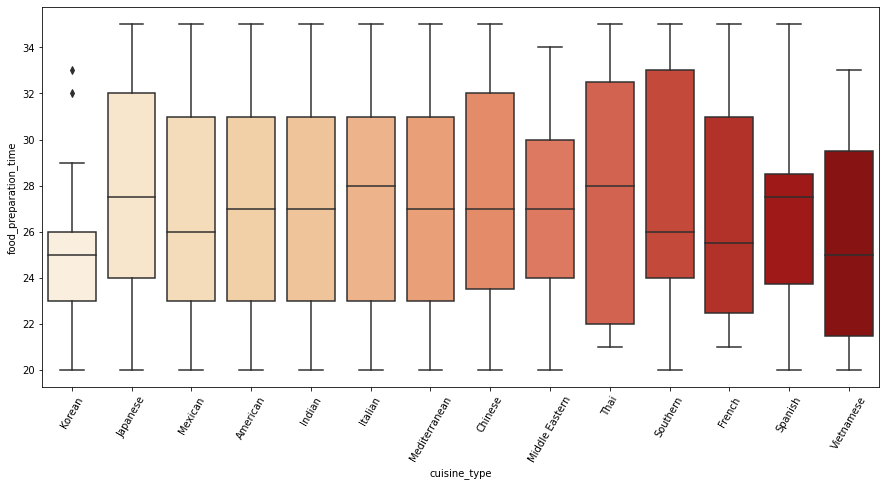

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x='cuisine_type',y='food_preparation_time',data = df, palette= 'OrRd')  
plt.xticks(rotation = 60)
plt.show()

* From the comparison of the cuisine types and the preparation time we can see that there is no big difference of the average time among the types of the cuisine. Maximum (Southern) 27 minutes; Minimum (Korean) 25 minutes.
* Only two restaurants that serve Korean cuisine are noticed to be the outliers on this comparison: the maximum prep time of the Korean food is 29 minutes and the two outliers are on 32 and 33 minutes.
* We can also say that Thai cuisine has the widest range of the preparation time among the restaurants: Q1 21 minutes and Q 32 minutes.   

## Day of the Week vs Delivery Time

In [ ]:
df.groupby('day_of_the_week').mean()[['delivery_time']].sort_values('delivery_time', ascending=False).reset_index()

,day_of_the_week,delivery_time
0,Weekday,28.340
1,Weekend,22.470


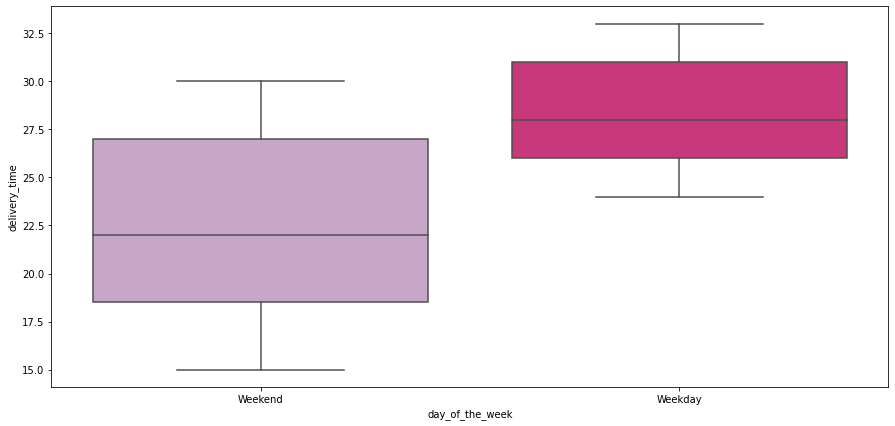

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x='day_of_the_week',y='delivery_time',data = df, palette = 'PuRd')  
plt.show()

* From the comparison of the day of the week and the delivery time we can see a clear difference between the Weekend delivery (22 minutes) and Weekday delivery times (28 minutes). On weekdays it takes 6 minutes longer on average for the orders to be delivered to the customers.

## Rating vs Delivery Time

In [ ]:
# First, we can check customers' ratings based on the average delivery time:
df.groupby('rating').mean()[['delivery_time']].sort_values('delivery_time', ascending=False).reset_index()

,rating,delivery_time
0,3,24.559
1,5,24.213
2,Not given,24.174
3,4,23.868


In [ ]:
df['delivery_time'].min()

15

In [ ]:
df['delivery_time'].max()

33

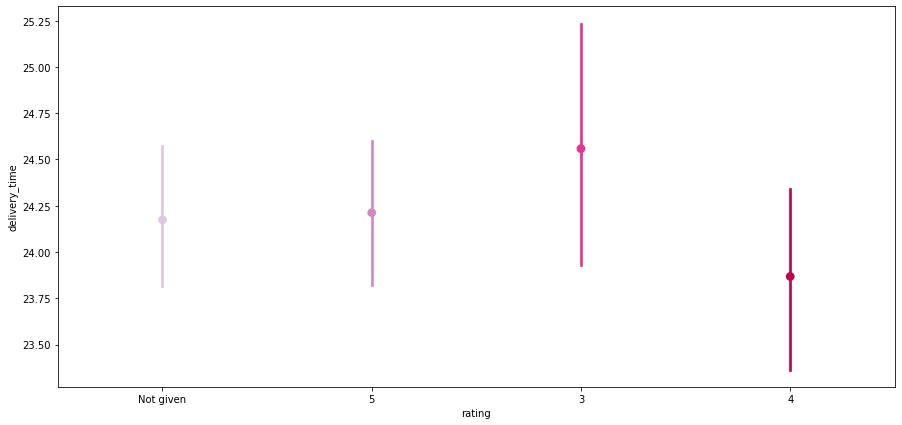

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df,palette = 'PuRd')
plt.show()

* From the analysis of customers' ratings in relation to the delivery time we can conclude that delivery time has some affect on the customer ratings. While we observe that the longer delivery times with the average of 24.55 minutes and above tend to have the rating 3, the shortest times were not given the highest ranking either - min. 15 minutes rated 4. But,based on the average delivery time ratings, customers gave the scores 4 and 5 to the delivery times that are less than 24.5 minutes.

## Rating vs Food Preparation Time

In [ ]:
# We can see the correlation between rating and food preparation time by running the mean, min, max functions:
df.groupby('rating').mean()[['food_preparation_time']].sort_values('food_preparation_time', ascending=False).reset_index()

,rating,food_preparation_time
0,3,27.431
1,4,27.396
2,Not given,27.357
3,5,27.355


In [ ]:
df['food_preparation_time'].min()

20

In [ ]:
df['food_preparation_time'].max()

35

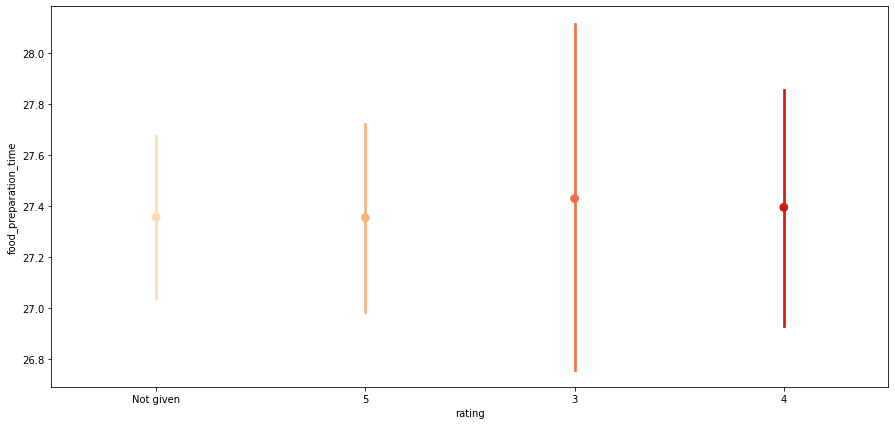

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating',y = 'food_preparation_time', data = df,palette='OrRd')  
plt.show()

* From the analysis of the rating and food preparation time we can see that there is no very strong correclation between these two variables. Customers rated 3 for the orders starting from the minimum time (20) to the max. (35), which may show that the time was not a factor of their evaluation. We also see the delivery time medians were very close across all the rating scores.

## Rating vs Cost of the Order

In [ ]:
# We can see the correlation between rating and cost of the order by running the mean, min, max functions:
df.groupby('rating').mean()[['cost_of_the_order']].sort_values('cost_of_the_order', ascending=False).reset_index()

,rating,cost_of_the_order
0,5,16.966
1,4,16.710
2,3,16.223
3,Not given,16.085


In [ ]:
df['cost_of_the_order'].min()

4.47

In [ ]:
df['cost_of_the_order'].max()

35.41

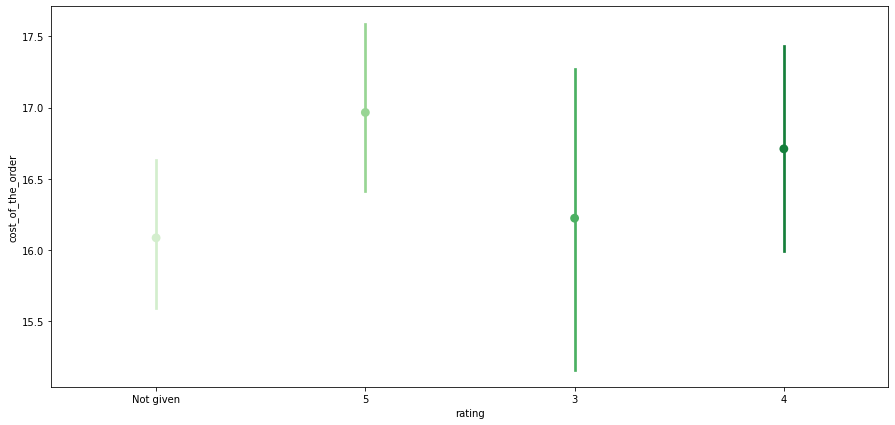

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df,palette='Greens')   
plt.show()

* By analyzing the correlation between the cost of orders and the rating we can see that more expensive orders have higher ratings: orders with the average of 17 dollars to the max priced orders are mainly rated 5;orders with the average cost of 16.5 dollars were rated 4. The rating 3 has the widest range of the prices, starting with the lowest price of 4.47 dollars to the orders prices around 17.3 dollars. 

### Revenue generated by the restaurants.

In [ ]:
# To calculate the revenue generated by every restaurant we will use the groupby() function and calculate the sum of the data:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                     3579.530
The Meatball Shop               2145.210
Blue Ribbon Sushi               1903.950
Blue Ribbon Fried Chicken       1662.290
Parm                            1112.760
RedFarm Broadway                 965.130
RedFarm Hudson                   921.210
TAO                              834.500
Han Dynasty                      755.290
Blue Ribbon Sushi Bar & Grill    666.620
Rubirosa                         660.450
Sushi of Gari 46                 640.870
Nobu Next Door                   623.670
Five Guys Burgers and Fries      506.470
Name: cost_of_the_order, dtype: float64

In [ ]:
# It will also help to see which restaurants got the most of the orders:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

* From the analysis of the data we can see that the maximum revenue was generated by Shake Shack -3579.530 dollars. This restaurant also has received the most number of orders (219) compared to other restaurants. We can also observe the same relationship in the second and the third highest revenues: the Meatball Shop (second highest revenue (2145.210 dollars/second most orders received); and Blue Ribbon Sushi (third highest revenue 1903.950 dollars, and third on the most orders received).

## Correlation Among Variables

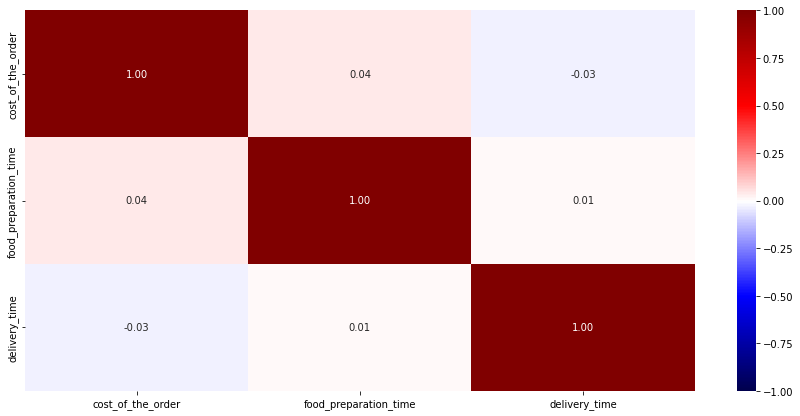

In [ ]:
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="seismic")
plt.show()

* The heatmap of the numeric variables show that the highest correlation exists between the food preparation time and the cost of the order. There is a negative/no correlation between the cost of the order and delivery time. 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# First, we will need to filter the restaurants that are rated. We will need to create a copy (.copy ()) data to ensure that our original data is not affected:
df_rated = df[df['rating'] != 'Not given'].copy()

# Since the original data was an object because of the non-rated orders, we need to convert rating column from object to integer:
df_rated['rating'] = df_rated['rating'].astype('int')  

# Now, we should create a dataframe that includes the restaurant names with their rating counts, listed in discending order:
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# First, we will need to filter the restaurants that are rated. We will need to create a copy (.copy ()) data to ensure that our original data is not affected:
df_rated = df[df['rating'] != 'Not given'].copy()

# Since the original data was an object because of the non-rated orders, we need to convert rating column from object to integer:
df_rated['rating'] = df_rated['rating'].astype('int')  

# Now, we should create a dataframe that includes the restaurant names with their rating counts, listed in discending order:
df_rating_count = df_rated.groupby(['cuisine_type'])['rating'].mean().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,cuisine_type,rating
0,Spanish,4.833
1,Thai,4.667
2,Indian,4.540
3,Mexican,4.417
4,Japanese,4.374


In [ ]:
# Once we have created a dataframe that is free from missing ratings, and have converted it to an integer, next, we will need to find the restaurants that have more than 50 ratings:
rest_data = df_rating_count[df_rating_count['rating']>50] ['restaurant_name']
# Then we create a dataframe that has filtered all the restaurants with more than 50 ratings:
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_data)].copy()
# Next, we need to find the average (mean) rating for the restaurants with more than 50 total ratings. Using df.mean() function, we will group the restaurant_name and rating columns:
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.512
1,Blue Ribbon Fried Chicken,4.328
2,Shake Shack,4.278
3,Blue Ribbon Sushi,4.219


In [ ]:
rest_data = df_rating_count[df_rating_count['rating']>50] ['restaurant_name']
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_data)].copy()
# It will also help to group by restaurant names and cuisine types:
df_mean_4.groupby(['restaurant_name','cuisine_type'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,cuisine_type,rating
0,The Meatball Shop,Italian,4.529
1,The Meatball Shop,American,4.429
2,Blue Ribbon Fried Chicken,American,4.328
3,Shake Shack,American,4.278
4,Blue Ribbon Sushi,Japanese,4.219


#### Observations:


*   Once we have filtered the ratings and restuarant names according to the company criteria (restaurants with the average greater than 4 rating scores and more than 50 ratings), we have found the list of restaurants that qualify for the promotional offer. The list of qualifying restaurants are:
 
1.   The Meatball Shop - 84 rating reviews with 4.5 average.
2.   Blue Ribbon Fried Chicken - 64 rating reviews with 4.3 average.
3.   Shake Shack - 133 rating reviews with 4.2 average.
4.   Blue Ribbon Sushi - 73 rating reviews with 4.2 average.






### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# First, we need to create a formula to calculate the revenue using the conditional if-else statement: 
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0
# The we apply the formula to the cost of orders. Forom the output, we will see that a new colum, revenue, has been added to the dataset;
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20,7.688
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,1.812
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,1.835
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,7.300
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,1.738


In [ ]:
# Once we have calculated the revenue from each order, we now calculate the total revenue of the company using df.sum():
total_revenue = df['Revenue'].sum()
print('The net revenue is around', round(total_revenue, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:

*   From charging 25% on the orders with the cost greater than 20 dollars and 15% from the orders with the cost greater than 5 dollars, the company made the revenue of 6166.3 dollars.



### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# First, we calculate the total delivery time and add a new column to the dataset df to store the total delivery time:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20,7.688,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,1.812,48
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,1.835,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,7.300,40
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,1.738,49


In [ ]:
# First, we filter the orders with total delivery time more than 60 minutes:
df_more_than_60 = df[df['total_time']>60]
print('The number of orders with total delivery time that takes more than 60 minutes is:', df_more_than_60.shape[0])
# We now get the percentage of the orders with total delivery time greater than 60 minutes:
percentage = (df_more_than_60.shape[0] / df.shape[0]) * 100
print("Percentage of orders that take more than 60 minutes is:", round(percentage, 2), '%')

The number of orders with total delivery time that takes more than 60 minutes is: 200
Percentage of orders that take more than 60 minutes is: 10.54 %


#### Observations:

*   Once we added a new column that calculated the total delivery time (food preparation+delivery time), we filtered the orders that took more than 60 minutes and then calculated the sum and the percentage of this new data.
*   The results show that 200 orders were delivered in more than 60 minutes. This number makes 10.54% of the total number of orders.




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# To find the average delivery time on weekdays and weekends, we will need to filter the 'weekday' and 'weekend' and run the mean function for each:
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')
print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations:


*  It takes on average longer (28 minutes) to deliver the orders on Weekdays than on Weekends (22 minutes).




### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? [6 marks]

### Conclusions:
*  
Insights
We analyzed a dataset of a food aggregator company, Foodhub, that allows customers to order food from 178 different restaurants from a single smartphone application. The dataset contains data of 1898 orders, which includes: order ID, customer ID, restaurant name, cuisine type, cost, day of the week, customer ratings, food preparation time, and delivery time.  Our objective was to get a fair idea about the demand of different restaurants which will help the company in enhancing their customer experience.
Conclusions:
1.	1200 out of 1898 orders were made by unique customers, which means that around 63% of the customers are the first time users of the application.
2.	Out of 178 different restaurants that are on Foodhub, we can observe that customers prefer different restaurants. Although there are a few restaurants that received more orders on average, the rate of the orders are not very significant.
3.	Different from the customers’ restaurant preferences, we observe that certain cuisine types are significantly popular. Out of 14 cuisine types served  by 178 restaurants, 4 cuisines (American-30%, Japanese-24%, Italian-15%, and Chinese-11%) comprise around 80% of the total orders. 
4.	The analysis showed that 38% of the orders were not rated by the customers.
5.	Most of the orders, 71% from the total number, were placed on Weekends.
6.	We also observed that orders on weekends are delivered faster than on weekdays
7.	The restaurants that received more than 50 ratings and the rating more than 4 serve the most popular cuisines: American, Italian, and Japanese.



### Recommendations:

1.	It is advised that the company worked on the promotional offers to increase returning customers.
2.	 American, Italian, and Japanese cuisines are the most popular cuisines among customers. Most of the ratings with 4 and above were given to the restaurants serving these cuisines. It is recommended to expand the restaurant choices serving these cuisine types.
3.	With 38% of the orders not rated, it is recommended that the company used different incentives to involve more customers to rate their orders.
4.	The number of orders are much higher on Weekends than on Weekdays. Some discounts or promotional offers could be planned to increase the orders during the weekdays. 
5.	Customers gave more positive ratings to the orders that were delivered in less than 25 minutes. The company can think of different strategies for restaurants to keep their delivery times within this time frame.
6.	According to the analysis around 10% of the orders (200 orders) were delivered in more than 60 minutes. Considering the fact that delivery time is an important factor in customer ratings, the company should consider of the strategies, such as refunding certain amount back to customers if the delivery is late or increasing the restaurant charges.
7.	More data, such as more complete customer ratings, delivery distances, and rating specifics could provide more detailed understanding of the customer profiles and their order patterns.  


---

In [ ]:
%%shell
jupyter nbconvert --to html /////content/Full_Code_Project_1_MOripova.ipynb

[NbConvertApp] Converting notebook /////content/Full_Code_Project_1_MOripova.ipynb to html
[NbConvertApp] Writing 721777 bytes to /////content/Full_Code_Project_1_MOripova.html
